here are the required libraies

pandas for reading dataset to dataframs

CountVectorizer tokenizes the input text. Tokenization is the process of breaking down the text into individual words (or tokens).

Logistic Regression can be used to classify emails as either "spam" or "not spam" based on features extracted from the email content.

train_test_split is a utility function in scikit-learn that splits your dataset into two subsets: a training set and a testing set.

confusion_matrix It helps to visualize the performance of a classification model by comparing the predicted classifications to the actual true values.

matplotlib used for interactive visualizations.

In [ ]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Download latest version
path = kagglehub.dataset_download("taweilo/mba-admission-dataset")

print("Path to dataset files:", path)
csv_file=None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break
if csv_file is None:
    print("No CSV file found in the downloaded dataset.")
else:
  print(f"Found CSV file: {csv_file}")
df = pd.read_csv(csv_file)
#print(df.head())
adf=df

adf['race']=adf['race'].fillna('Americans')
adf['admission']=adf['admission'].fillna('deny')

adf['admission'] = adf['admission'].apply(lambda x: 1 if x == 'deny' else 0)
print(adf.describe())
print(adf.head())
print(adf.info())


Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/mba-admission-dataset/versions/2
Found CSV file: /root/.cache/kagglehub/datasets/taweilo/mba-admission-dataset/versions/2/MBA.csv
       application_id          gpa         gmat     work_exp    admission
count     6194.000000  6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952     0.838553
std       1788.198115     0.151541    49.294883     1.032432     0.367972
min          1.000000     2.650000   570.000000     1.000000     0.000000
25%       1549.250000     3.150000   610.000000     4.000000     1.000000
50%       3097.500000     3.250000   650.000000     5.000000     1.000000
75%       4645.750000     3.350000   680.000000     6.000000     1.000000
max       6194.000000     3.770000   780.000000     9.000000     1.000000
   application_id  gender  international   gpa       major       race   gmat  \
0               1  Female          False  3.30    Business   

checking null values in the dataset

In [ ]:
print(adf.info())
print(adf.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   int64  
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 441.7+ KB
None
application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


To replace the null values in the admission column with specific values such as "deny"


here raplace the null values in race column with Americans

using labelencoder to encode categorical variables to binary values or numerical values like 0 for 'Male, 1 for 'Female' in **gender** and 0 for 'No', 1 for 'Yes' in **international** same as 0 for 'Accepted', 1 for 'Denied' and 2 for 'Waitlist' in **admission**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Example: Encoding 'gender', 'international', and 'admission' as binary labels
adf['gender'] = label_encoder.fit_transform(df['gender'])
adf['international'] = label_encoder.fit_transform(df['international'])



print(adf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   int64  
 2   international   6194 non-null   int64  
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 484.0+ KB
None


using labelencoder to encode categorical variables to numerical values like 'Business' → 0 ,'Computer Science' → 1,'Engineering' → 2in **major** and 'Asian' → 0,'White' → 1,'Hispanic' → 2,'Other' → 3,'Americans' → 4 and 'Black' → 5 in **race** same as 'Tech' → 2,'Finance' → 1ans ect in **work_industry**

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'major', 'race', and 'work_industry' columns
adf['major'] = label_encoder.fit_transform(adf['major'])
adf['race'] = label_encoder.fit_transform(adf['race'])
adf['work_industry'] = label_encoder.fit_transform(adf['work_industry'])

print(adf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   int64  
 2   international   6194 non-null   int64  
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   int64  
 5   race            6194 non-null   int64  
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   int64  
 9   admission       6194 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 484.0 KB
None


This will print the correlation coefficients between all the numerical columns.

In [ ]:
# Calculate correlation matrix (numerical columns only)
correlation_matrix = adf.corr()

# Display the correlation matrix
print(correlation_matrix)


                application_id    gender  international       gpa     major  \
application_id        1.000000 -0.022440       0.008045  0.013872 -0.011869   
gender               -0.022440  1.000000       0.007646  0.022210  0.025773   
international         0.008045  0.007646       1.000000 -0.028540 -0.007301   
gpa                   0.013872  0.022210      -0.028540  1.000000 -0.006697   
major                -0.011869  0.025773      -0.007301 -0.006697  1.000000   
race                 -0.014398 -0.004589      -0.706728  0.013470 -0.005034   
gmat                  0.004694  0.022815      -0.014784  0.577539  0.003594   
work_exp              0.003100 -0.007427      -0.010341  0.000346  0.006741   
work_industry        -0.027823  0.001822      -0.001282 -0.009687  0.014921   
admission             0.112600  0.124600      -0.010190 -0.289618 -0.001148   

                    race      gmat  work_exp  work_industry  admission  
application_id -0.014398  0.004694  0.003100      -0.0278

By seeing this heatmaps is used to display the correlation matrix between different variables. It helps you quickly assess which variables are strongly correlated with each other and which are not.

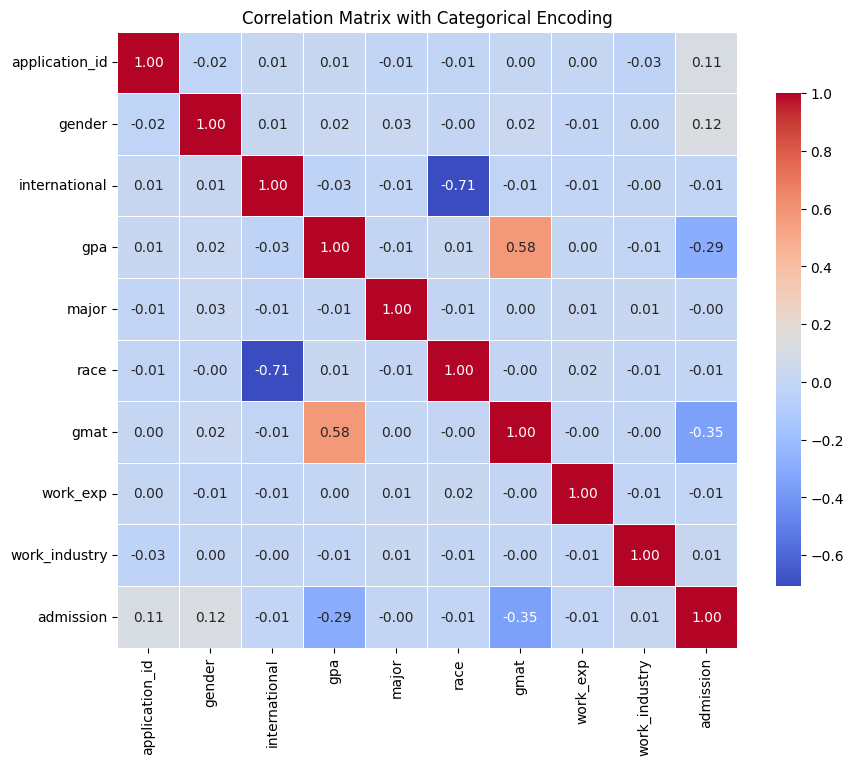

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix with Categorical Encoding')
plt.show()

here i am doing logistic model and train and test the model and find the accuracy for this

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Define the columns to use
columns = ['application_id','gender','international','gpa','major','race','gmat','work_exp','work_industry']

# Step 2: Split data into features and target
X = adf[columns]  # Drop 'admission' column from features
y = adf['admission']  # Target variable (binary: 1 for Admit, 0 for anything else)
# Step 3: Perform stratified split to ensure both classes are present in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=6000)  # Increased max_iter to ensure convergence
logreg_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = logreg_model.predict(X_test)

# Step 6: Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8329


 Confusion Matrix:

 This matrix helps in evaluating the performance of a classification algorithm by showing the counts of actual versus predicted classifications.

y_test: Actual values from the test dataset (ground truth).

y_pred: Predicted values by the model.

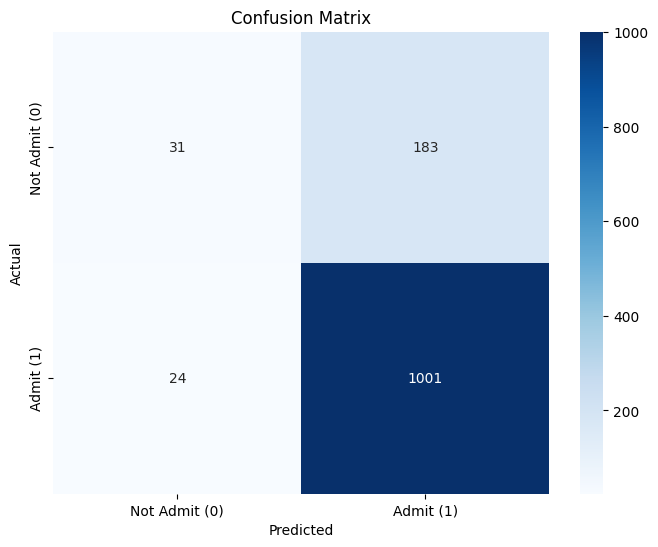


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.14      0.23       214
           1       0.85      0.98      0.91      1025

    accuracy                           0.83      1239
   macro avg       0.70      0.56      0.57      1239
weighted avg       0.80      0.83      0.79      1239



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit (0)', 'Admit (1)'], yticklabels=['Not Admit (0)', 'Admit (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


**DecisionTreeClassifier**:

This model is part of the sklearn.tree module and is used to perform classification tasks. It works by splitting the data into subsets based on feature values, forming a tree structure.
The classifier tries to minimize impurity (usually Gini impurity or entropy) at each split, aiming to achieve the most homogeneous subsets.

Accuracy: 0.8321
Confusion Matrix:
[[108 106]
 [102 923]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       214
           1       0.90      0.90      0.90      1025

    accuracy                           0.83      1239
   macro avg       0.71      0.70      0.70      1239
weighted avg       0.83      0.83      0.83      1239



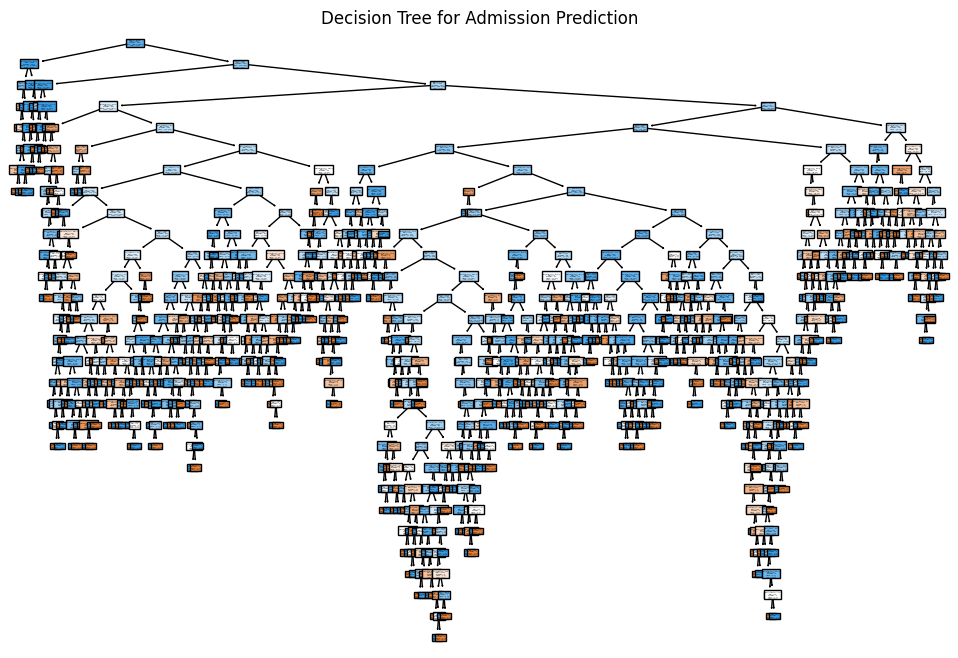

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Step 4: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = dt_classifier.predict(X_test)

# Step 6: Evaluate the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Deny', 'Admit'])
plt.title('Decision Tree for Admission Prediction')
plt.show()

**RandomForestClassifier:**

A Random Forest is an ensemble method that builds multiple decision trees and combines their results. Each tree is trained on a random subset of the data, and predictions are made by averaging (for regression) or majority voting (for classification) across all trees.

Random forests help to reduce overfitting compared to a single decision tree, making them more robust for real-world tasks.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 4: Train the Decision Tree Classifier
rd_classifier = RandomForestClassifier(random_state=42)
rd_classifier.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = rd_classifier.predict(X_test)

# Step 6: Evaluate the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8571
Confusion Matrix:
[[ 71 143]
 [ 34 991]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.33      0.45       214
           1       0.87      0.97      0.92      1025

    accuracy                           0.86      1239
   macro avg       0.78      0.65      0.68      1239
weighted avg       0.84      0.86      0.84      1239



**GridSearchCV** will evaluate each combination of hyperparameters by training the model and evaluating it using cross-validation (on the training set), and it will select the combination that gives the best average performance.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 4: Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=6000)  # Increased max_iter to ensure convergence
logreg_model.fit(X_train, y_train)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Step 6: Make predictions using the best model
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.4f}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of the best model: 0.8305


**Random search** can be a more efficient alternative to grid search when the hyperparameter space is large, as it doesn't try all combinations but rather randomly samples from the hyperparameter distribution.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Define your Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Define the hyperparameter space (fix max_features)
param_dist = {
    'n_estimators': np.arange(10, 201, 10),  # Number of trees in the forest
    'max_depth': np.arange(1, 21),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'max_features': ['sqrt', 'log2'],  # Valid values for max_features
    'bootstrap': [True, False]  # Whether to bootstrap samples when building trees
}

# Step 3: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Number of random combinations to test
                                   cv=5,  # 5-fold cross-validation
                                   n_jobs=-1,  # Use all available CPU cores
                                   verbose=1,  # Display progress
                                   random_state=42)

# Step 4: Fit RandomizedSearchCV to your training data
random_search.fit(X_train, y_train)

# Step 5: Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Step 6: Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy of the best model: {accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Accuracy of the best model: 0.8612


**Navie Bayes** is a classification algorithm that uses probability theory to predict the class of a sample, assuming that the features are independent of each other given the class.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Display the predicted values
print("Predictions:", y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Predictions: [1 1 1 ... 1 1 0]
Accuracy: 0.84

Confusion Matrix:
[[ 64 150]
 [ 54 971]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.30      0.39       214
           1       0.87      0.95      0.90      1025

    accuracy                           0.84      1239
   macro avg       0.70      0.62      0.65      1239
weighted avg       0.81      0.84      0.82      1239



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 4: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the SVM model (using an RBF kernel)
svm = SVC(kernel='rbf', gamma='scale', C=1.0)  # RBF kernel with default hyperparameters
svm.fit(X_train_scaled, y_train)

# Step 6: Make Predictions on the Test Set
y_pred = svm.predict(X_test_scaled)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85

Confusion Matrix:
[[  30  184]
 [   7 1018]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.14      0.24       214
           1       0.85      0.99      0.91      1025

    accuracy                           0.85      1239
   macro avg       0.83      0.57      0.58      1239
weighted avg       0.84      0.85      0.80      1239



In [ ]:
print(adf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   int64  
 2   international   6194 non-null   int64  
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   int64  
 5   race            6194 non-null   int64  
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   int64  
 9   admission       6194 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 484.0 KB
None


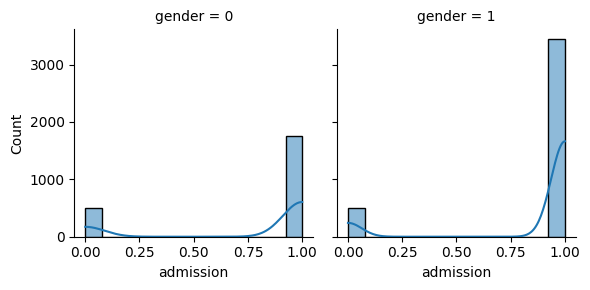

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with 'gender' as the column
g = sns.FacetGrid(adf, col="gender")

# Map the plot function (e.g., histogram) to each facet
g.map(sns.histplot, "admission", kde=True)

# Display the plot
plt.show()
